<a href="https://colab.research.google.com/github/afroman32/DS-Unit-1-Build/blob/master/Australian_Football_League_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to Portfolio](https://afroman32.github.io/)

#**Upload and inspect Data**

In [0]:
# import pandas for viewing and cleaning
import pandas as pd

In [67]:
# import data to dataframe
df = pd.read_csv('https://raw.githubusercontent.com/afroman32/afroman32.github.io/master/_data/goodstats.csv')

# inspect the head
df.head()

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,Margin,WinLoss,Opposition,Venue,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
0,Adelaide,"Atkins, Rory",1994-07-12,186,85,Midfield,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,14,8,1,6,0,2,0,2,2,4,1,1,1,0,0,4,9,0,0,0,0,1,86
1,Adelaide,"Betts, Eddie",1986-11-26,174,74,Forward,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,14,7,2,7,0,2,0,2,0,1,1,1,1,0,0,6,9,0,1,3,0,1,85
2,Adelaide,"Brown, Luke",1992-09-22,181,81,Defender,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,15,10,2,5,0,0,0,0,5,1,0,0,0,0,0,1,10,0,0,2,0,0,82
3,Adelaide,"Crouch, Matt",1995-04-21,182,80,Midfield,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,41,18,6,23,0,0,0,2,3,3,7,4,0,1,0,11,31,0,0,0,0,1,80
4,Adelaide,"Doedee, Tom",1997-03-01,188,88,Defender,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,21,7,7,14,0,0,0,2,4,1,0,2,2,0,0,8,14,0,0,9,1,0,93


In [68]:
# check for null values
df.isnull().sum()

Team                       0
Player                     0
D.O.B                      0
Height                     0
Weight                     0
Position                   0
Season                     0
Round                      0
Date                      88
Score                     88
Margin                    88
WinLoss                   88
Opposition                88
Venue                     88
Disposals                  0
Kicks                      0
Marks                      0
Handballs                  0
Goals                      0
Behinds                    0
Hitouts                    0
Tackles                    0
Rebound50s                 0
Inside50s                  0
Clearances                 0
Clangers                   0
FreesFor                   0
FreesAgainst               0
BrownlowVotes              0
ContendedPossessions       0
UncontendedPossessions     0
ContestedMarks             0
MarksInside50              0
OnePercenters              0
Bounces       

#**Fill NaN Values**

In [69]:
# create a dataframe of null values in venues
null_ven = df[df['Venue'].isnull() == True]

# check null values, has them all
null_ven.isnull().sum()

Team                       0
Player                     0
D.O.B                      0
Height                     0
Weight                     0
Position                   0
Season                     0
Round                      0
Date                      88
Score                     88
Margin                    88
WinLoss                   88
Opposition                88
Venue                     88
Disposals                  0
Kicks                      0
Marks                      0
Handballs                  0
Goals                      0
Behinds                    0
Hitouts                    0
Tackles                    0
Rebound50s                 0
Inside50s                  0
Clearances                 0
Clangers                   0
FreesFor                   0
FreesAgainst               0
BrownlowVotes              0
ContendedPossessions       0
UncontendedPossessions     0
ContestedMarks             0
MarksInside50              0
OnePercenters              0
Bounces       

In [70]:
# which teams have null values
null_ven['Team'].value_counts()

Collingwood    22
Geelong        22
Melbourne      22
West Coast     22
Name: Team, dtype: int64

In [71]:
# isolate one team to work with
colling = null_ven[null_ven['Team'] == 'Collingwood']

# make sure the shape matches what is expected
colling.shape

(22, 37)

In [72]:
# inspect the head
colling.head()

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,Margin,WinLoss,Opposition,Venue,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
1936,Collingwood,"Adams, Taylor",1993-09-20,181,83,Midfield,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,26,18,4,8,2,0,0,7,4,7,6,7,2,2,0,12,18,0,0,4,1,0,73
1937,Collingwood,"Aish, James",1995-11-08,183,80,"Defender, Midfield",2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,21,12,3,9,0,0,0,2,7,1,1,6,3,1,0,12,9,0,0,3,0,0,84
1938,Collingwood,"Cox, Mason",1991-03-14,211,108,Forward,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,5,4,2,1,0,0,1,0,0,1,0,1,0,1,0,3,2,0,0,7,0,0,88
1939,Collingwood,"Crisp, Jack",1993-10-02,190,91,Defender,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,21,13,4,8,0,0,0,3,3,3,0,4,0,1,0,8,13,0,0,4,0,2,90
1940,Collingwood,"Goldsack, Tyson",1987-05-22,193,93,Defender,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,6,1,0,5,0,0,0,1,1,0,0,0,1,0,0,6,0,0,0,9,0,0,86


In [73]:
# two teams from round QF and two teams from round EF
null_ven['Round'].value_counts()

EF    44
QF    44
Name: Round, dtype: int64

In [0]:
# missing stats for the four teams, found at afltables.com
# used the specific round QF to find needed stats

# Colling Team
colling_stats = ['2018-09-08', 70, -16.0, 'L', 'West Coast', 'Perth Stadium']

# West Coast Team
westcoast_stats = ['2018-09-08', 86.0, 16.0, 'W', 'Collingwood', 'Perth Stadium']


# Use unique identifier round EF to find needed stats at afltables.com

# Geelong Team
geelong_stats = ['2018-09-07', 46.0, -29.0, 'L', 'Melbourne', 'M.C.G']

# Melbourne Team
melbourne_stats = ['2018-09-07', 75.0, 29.0, 'W', 'Geelong', 'M.C.G']


In [0]:
# Function to change missing values
# parameters need a dataframe, index of rows to change and values to change
def fix_stats(fixit, index, stats):

  # sets column names
  cols = ['Date', 'Score', 'Margin', 'WinLoss', 'Opposition', 'Venue']

  for i in range(0,len(cols)):
    # puts in missing stats at specified index
    fixit.at[index[0] : index[1], cols[i]] = stats[i]

In [76]:
# test function on colling dataframe
fix_stats(colling, [1936, 1957], colling_stats)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [77]:
# inspect head
colling.head()

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,Margin,WinLoss,Opposition,Venue,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
1936,Collingwood,"Adams, Taylor",1993-09-20,181,83,Midfield,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,26,18,4,8,2,0,0,7,4,7,6,7,2,2,0,12,18,0,0,4,1,0,73
1937,Collingwood,"Aish, James",1995-11-08,183,80,"Defender, Midfield",2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,21,12,3,9,0,0,0,2,7,1,1,6,3,1,0,12,9,0,0,3,0,0,84
1938,Collingwood,"Cox, Mason",1991-03-14,211,108,Forward,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,5,4,2,1,0,0,1,0,0,1,0,1,0,1,0,3,2,0,0,7,0,0,88
1939,Collingwood,"Crisp, Jack",1993-10-02,190,91,Defender,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,21,13,4,8,0,0,0,3,3,3,0,4,0,1,0,8,13,0,0,4,0,2,90
1940,Collingwood,"Goldsack, Tyson",1987-05-22,193,93,Defender,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,6,1,0,5,0,0,0,1,1,0,0,0,1,0,0,6,0,0,0,9,0,0,86


In [78]:
# check shape stayed consistent
print(colling.shape)

# Make sure changes persisted
colling

(22, 37)


,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,Margin,WinLoss,Opposition,Venue,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
1936,Collingwood,"Adams, Taylor",1993-09-20,181,83,Midfield,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,26,18,4,8,2,0,0,7,4,7,6,7,2,2,0,12,18,0,0,4,1,0,73
1937,Collingwood,"Aish, James",1995-11-08,183,80,"Defender, Midfield",2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,21,12,3,9,0,0,0,2,7,1,1,6,3,1,0,12,9,0,0,3,0,0,84
1938,Collingwood,"Cox, Mason",1991-03-14,211,108,Forward,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,5,4,2,1,0,0,1,0,0,1,0,1,0,1,0,3,2,0,0,7,0,0,88
1939,Collingwood,"Crisp, Jack",1993-10-02,190,91,Defender,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,21,13,4,8,0,0,0,3,3,3,0,4,0,1,0,8,13,0,0,4,0,2,90
1940,Collingwood,"Goldsack, Tyson",1987-05-22,193,93,Defender,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,6,1,0,5,0,0,0,1,1,0,0,0,1,0,0,6,0,0,0,9,0,0,86
1941,Collingwood,"Greenwood, Levi",1989-02-19,181,87,Defender,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,13,10,3,3,0,0,0,0,1,1,0,4,0,1,0,2,11,0,0,4,2,0,65
1942,Collingwood,"Grundy, Brodie",1994-04-15,203,102,Ruck,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,18,7,2,11,0,0,48,3,0,1,4,2,1,0,0,9,8,0,0,6,0,0,93
1943,Collingwood,"Hoskin-Elliott, Will",1993-09-02,186,81,Forward,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,15,10,6,5,0,2,0,4,2,0,0,0,2,0,0,7,10,0,1,3,0,0,75
1944,Collingwood,"Howe, Jeremy",1990-06-29,190,88,Defender,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,16,10,6,6,0,0,0,2,1,0,0,4,0,0,0,6,9,2,0,15,0,0,98
1945,Collingwood,"Langdon, Tom",1994-06-09,190,83,Defender,2018,QF,2018-09-08,70,-16.0,L,West Coast,Perth Stadium,12,3,2,9,0,0,0,3,2,0,0,2,1,2,0,6,7,0,0,10,0,0,91


In [79]:
# create a copy of main dataframe to test fix_stats function
test = df

# find the correct slice
print(test.loc[1936:1957].shape)
test.loc[1936:1957]

(22, 37)


,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,Margin,WinLoss,Opposition,Venue,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
1936,Collingwood,"Adams, Taylor",1993-09-20,181,83,Midfield,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,26,18,4,8,2,0,0,7,4,7,6,7,2,2,0,12,18,0,0,4,1,0,73
1937,Collingwood,"Aish, James",1995-11-08,183,80,"Defender, Midfield",2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,21,12,3,9,0,0,0,2,7,1,1,6,3,1,0,12,9,0,0,3,0,0,84
1938,Collingwood,"Cox, Mason",1991-03-14,211,108,Forward,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,5,4,2,1,0,0,1,0,0,1,0,1,0,1,0,3,2,0,0,7,0,0,88
1939,Collingwood,"Crisp, Jack",1993-10-02,190,91,Defender,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,21,13,4,8,0,0,0,3,3,3,0,4,0,1,0,8,13,0,0,4,0,2,90
1940,Collingwood,"Goldsack, Tyson",1987-05-22,193,93,Defender,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,6,1,0,5,0,0,0,1,1,0,0,0,1,0,0,6,0,0,0,9,0,0,86
1941,Collingwood,"Greenwood, Levi",1989-02-19,181,87,Defender,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,13,10,3,3,0,0,0,0,1,1,0,4,0,1,0,2,11,0,0,4,2,0,65
1942,Collingwood,"Grundy, Brodie",1994-04-15,203,102,Ruck,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,18,7,2,11,0,0,48,3,0,1,4,2,1,0,0,9,8,0,0,6,0,0,93
1943,Collingwood,"Hoskin-Elliott, Will",1993-09-02,186,81,Forward,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,15,10,6,5,0,2,0,4,2,0,0,0,2,0,0,7,10,0,1,3,0,0,75
1944,Collingwood,"Howe, Jeremy",1990-06-29,190,88,Defender,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,16,10,6,6,0,0,0,2,1,0,0,4,0,0,0,6,9,2,0,15,0,0,98
1945,Collingwood,"Langdon, Tom",1994-06-09,190,83,Defender,2018,QF,NaN,NaN,NaN,NaN,NaN,NaN,12,3,2,9,0,0,0,3,2,0,0,2,1,2,0,6,7,0,0,10,0,0,91


In [0]:
# test function on test dataframe
fix_stats(test, [1936, 1957], colling_stats)

In [81]:
# check if changes persisted
test.loc[1936:1957]

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,Margin,WinLoss,Opposition,Venue,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
1936,Collingwood,"Adams, Taylor",1993-09-20,181,83,Midfield,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,26,18,4,8,2,0,0,7,4,7,6,7,2,2,0,12,18,0,0,4,1,0,73
1937,Collingwood,"Aish, James",1995-11-08,183,80,"Defender, Midfield",2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,21,12,3,9,0,0,0,2,7,1,1,6,3,1,0,12,9,0,0,3,0,0,84
1938,Collingwood,"Cox, Mason",1991-03-14,211,108,Forward,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,5,4,2,1,0,0,1,0,0,1,0,1,0,1,0,3,2,0,0,7,0,0,88
1939,Collingwood,"Crisp, Jack",1993-10-02,190,91,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,21,13,4,8,0,0,0,3,3,3,0,4,0,1,0,8,13,0,0,4,0,2,90
1940,Collingwood,"Goldsack, Tyson",1987-05-22,193,93,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,6,1,0,5,0,0,0,1,1,0,0,0,1,0,0,6,0,0,0,9,0,0,86
1941,Collingwood,"Greenwood, Levi",1989-02-19,181,87,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,13,10,3,3,0,0,0,0,1,1,0,4,0,1,0,2,11,0,0,4,2,0,65
1942,Collingwood,"Grundy, Brodie",1994-04-15,203,102,Ruck,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,18,7,2,11,0,0,48,3,0,1,4,2,1,0,0,9,8,0,0,6,0,0,93
1943,Collingwood,"Hoskin-Elliott, Will",1993-09-02,186,81,Forward,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,15,10,6,5,0,2,0,4,2,0,0,0,2,0,0,7,10,0,1,3,0,0,75
1944,Collingwood,"Howe, Jeremy",1990-06-29,190,88,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,16,10,6,6,0,0,0,2,1,0,0,4,0,0,0,6,9,2,0,15,0,0,98
1945,Collingwood,"Langdon, Tom",1994-06-09,190,83,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,12,3,2,9,0,0,0,3,2,0,0,2,1,2,0,6,7,0,0,10,0,0,91


In [0]:
# Apply changes to original dataframe

# Fix Collingwood Team Stats
fix_stats(df, [1936, 1957], colling_stats)

# Fix West Coast Team
fix_stats(df, [8558,8579], westcoast_stats)

# Fix Melbourne Team
fix_stats(df, [5522, 5543], melbourne_stats)

# Fix Geelong Team Stats
fix_stats(df, [3476, 3497], geelong_stats)

In [83]:
# check if null values are fixed
df.isnull().sum()

Team                      0
Player                    0
D.O.B                     0
Height                    0
Weight                    0
Position                  0
Season                    0
Round                     0
Date                      0
Score                     0
Margin                    0
WinLoss                   0
Opposition                0
Venue                     0
Disposals                 0
Kicks                     0
Marks                     0
Handballs                 0
Goals                     0
Behinds                   0
Hitouts                   0
Tackles                   0
Rebound50s                0
Inside50s                 0
Clearances                0
Clangers                  0
FreesFor                  0
FreesAgainst              0
BrownlowVotes             0
ContendedPossessions      0
UncontendedPossessions    0
ContestedMarks            0
MarksInside50             0
OnePercenters             0
Bounces                   0
GoalAssists         

#**Clean DataFrame**

In [0]:
# drop unnecessary columns
df.drop(labels = ['D.O.B', 'Height', 'Weight', 'PercentPlayed', 'Margin', 'Venue', 'Position', 'Opposition', 'Date', 'Round', 'Player', 'Score'], axis = 1, inplace = True)

In [85]:
# create a key to convert wins and losses to numbers.
# Win is 1, Loss is -1, Draw is 0
winlosskey = {'W' : 1, 'L' : -1, 'D' : 0}

# Apply key to dataframe
test['WinLoss'].replace(winlosskey, inplace = True)

# inspect head
test.head()

,Team,Season,WinLoss,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists
0,Adelaide,2018,-1,14,8,1,6,0,2,0,2,2,4,1,1,1,0,0,4,9,0,0,0,0,1
1,Adelaide,2018,-1,14,7,2,7,0,2,0,2,0,1,1,1,1,0,0,6,9,0,1,3,0,1
2,Adelaide,2018,-1,15,10,2,5,0,0,0,0,5,1,0,0,0,0,0,1,10,0,0,2,0,0
3,Adelaide,2018,-1,41,18,6,23,0,0,0,2,3,3,7,4,0,1,0,11,31,0,0,0,0,1
4,Adelaide,2018,-1,21,7,7,14,0,0,0,2,4,1,0,2,2,0,0,8,14,0,0,9,1,0


#**Additional Cleaning**

In [0]:
# Sort the dataframe by Teams
test.sort_values(by = 'Team')

# reset the index so it starts at 1 and goes on. Do this for clearer slices
test.reset_index(drop = True, inplace = True)

In [87]:
# inspect head
test.head()

,Team,Season,WinLoss,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists
0,Adelaide,2018,-1,14,8,1,6,0,2,0,2,2,4,1,1,1,0,0,4,9,0,0,0,0,1
1,Adelaide,2018,-1,14,7,2,7,0,2,0,2,0,1,1,1,1,0,0,6,9,0,1,3,0,1
2,Adelaide,2018,-1,15,10,2,5,0,0,0,0,5,1,0,0,0,0,0,1,10,0,0,2,0,0
3,Adelaide,2018,-1,41,18,6,23,0,0,0,2,3,3,7,4,0,1,0,11,31,0,0,0,0,1
4,Adelaide,2018,-1,21,7,7,14,0,0,0,2,4,1,0,2,2,0,0,8,14,0,0,9,1,0


In [0]:
# create a dataframe of stats per season
s_2012 = test[test['Season'] == 2012]
s_2013 = test[test['Season'] == 2013]
s_2014 = test[test['Season'] == 2014]
s_2015 = test[test['Season'] == 2015]
s_2016 = test[test['Season'] == 2016]
s_2017 = test[test['Season'] == 2017]
s_2018 = test[test['Season'] == 2018]

In [89]:
# inspect head
s_2012.head()

,Team,Season,WinLoss,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists
54604,Adelaide,2012,1,18,14,5,4,2,5,0,5,0,2,1,4,0,1,0,9,9,0,3,0,0,0
54605,Adelaide,2012,1,25,13,3,12,2,0,0,2,0,6,9,4,0,1,0,14,11,0,1,1,1,0
54606,Adelaide,2012,1,17,5,4,12,0,0,0,3,1,2,0,0,2,0,0,8,8,0,0,2,0,0
54607,Adelaide,2012,1,19,14,6,5,1,3,0,7,1,5,0,3,2,0,0,6,16,0,1,5,0,2
54608,Adelaide,2012,1,8,5,1,3,0,0,0,1,0,1,0,1,0,0,0,2,5,0,0,1,0,1


In [0]:
# Get index positions of a specific value in dataframe
def getIndexes(data, value):
    indices = list()

    # Get positions where the value exists
    result = data.isin([value])

    # Find columns that contain the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)

    # comb over columns and find rows that contain the value
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        
        #add row index to indices list 
        for row in rows:
            indices.append(row)

    # Return a list of first and last index of value
    return(indices[0], indices[-1])

In [91]:
# test function with s_2012 dataframe and value of Adelaide
getIndexes(s_2016, 'Adelaide')

(18216, 18743)

In [92]:
# create a list of teams
teams = pd.DataFrame(df['Team'].value_counts()).T.columns

# sort teams alphabetically
teams = teams.sort_values()

# check it out
teams

Index(['Adelaide', 'Brisbane Lions', 'Carlton', 'Collingwood', 'Essendon',
       'Fremantle', 'Geelong', 'Gold Coast', 'Greater Western Sydney',
       'Hawthorn', 'Melbourne', 'North Melbourne', 'Port Adelaide', 'Richmond',
       'St Kilda', 'Sydney', 'West Coast', 'Western Bulldogs'],
      dtype='object')

In [0]:
# function to combine stats per player per season into stats per team per season
def newDF(data, season):
  finaldf = pd.DataFrame()

  # iterate through for each team
  for i in range(0, len(teams)):

    # get index of the team to combine
    slice = getIndexes(data, teams[i])

    # create a temporary dataframe with the sum of the teams and transpose
    # so variables and columns are correct
    new = pd.DataFrame(data.loc[slice[0]:slice[1]].sum()).T

    # set value Team to the team
    new['Team'] = teams[i]

    # set the value Season to the seasn
    new['Season'] = season
       
    # create a new dataframe with the stats per team per season
    finaldf = finaldf.append(new, ignore_index = True)

    # return newDF
  return finaldf  

In [94]:
# test newDF with stats for 2012 season
newDF(s_2012, 2012).head()

,Team,Season,WinLoss,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists
0,Adelaide,2012,242,8764,5429,2275,3335,388,265,1095,1458,841,1304,1006,1096,434,456,88,3713,4996,318,335,1192,169,270
1,Brisbane Lions,2012,-44,7716,4403,1890,3313,279,185,749,1393,817,1048,808,1097,398,446,55,3086,4595,204,218,1230,116,172
2,Carlton,2012,0,7853,4625,1975,3228,299,227,937,1520,651,1165,867,986,398,419,76,3131,4648,230,294,1128,272,187
3,Collingwood,2012,198,9231,5481,2294,3750,340,257,905,1625,893,1307,965,1088,410,410,85,3658,5522,313,305,1265,307,222
4,Essendon,2012,0,7765,4666,2003,3099,299,243,942,1345,774,1225,798,1027,418,403,63,3147,4600,261,252,1094,168,202


In [95]:
# test newDF with stats for 2014 season
newDF(s_2014, 2014).head()

,Team,Season,WinLoss,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists
0,Adelaide,2014,0,8070,4562,1872,3508,315,225,886,1366,776,1212,862,928,371,319,71,3189,4804,247,242,1109,254,209
1,Brisbane Lions,2014,-176,7669,4163,1882,3506,221,148,840,1405,780,1002,808,965,382,395,42,2749,4835,162,185,1166,166,149
2,Carlton,2014,-154,7510,4620,2031,2890,276,188,899,1353,782,1046,841,911,396,317,59,2937,4530,211,257,1132,304,187
3,Collingwood,2014,0,7703,4431,1872,3272,252,191,778,1564,750,1092,760,1022,325,355,60,2965,4691,191,261,1103,222,172
4,Essendon,2014,44,8842,5158,2470,3684,274,193,843,1515,741,1223,862,975,361,367,68,3106,5734,243,280,1098,137,187


In [0]:
# set the season to 2012
season = 2012

# create a new empty dataframe
finalfinal = pd.DataFrame()

# create a list of dataframes for each season
dataframelist = [s_2012, s_2013, s_2014, s_2015, s_2016, s_2017, s_2018]


for i, titles in enumerate(dataframelist):
  # team_season = newDF(titles, season)
  finalfinal = finalfinal.append(newDF(titles, season), ignore_index = True)
  season+=1

In [97]:
# check that each season has the correct number of rows
finalfinal['Season'].value_counts()

2018    18
2017    18
2016    18
2015    18
2014    18
2013    18
2012    18
Name: Season, dtype: int64

In [98]:
# check the shape
print(finalfinal.shape)

# inspect head
finalfinal.head()

(126, 25)


,Team,Season,WinLoss,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists
0,Adelaide,2012,242,8764,5429,2275,3335,388,265,1095,1458,841,1304,1006,1096,434,456,88,3713,4996,318,335,1192,169,270
1,Brisbane Lions,2012,-44,7716,4403,1890,3313,279,185,749,1393,817,1048,808,1097,398,446,55,3086,4595,204,218,1230,116,172
2,Carlton,2012,0,7853,4625,1975,3228,299,227,937,1520,651,1165,867,986,398,419,76,3131,4648,230,294,1128,272,187
3,Collingwood,2012,198,9231,5481,2294,3750,340,257,905,1625,893,1307,965,1088,410,410,85,3658,5522,313,305,1265,307,222
4,Essendon,2012,0,7765,4666,2003,3099,299,243,942,1345,774,1225,798,1027,418,403,63,3147,4600,261,252,1094,168,202


In [99]:
# check team to make shure data is correct for each season
finalfinal[finalfinal['Team'] == 'Brisbane Lions'].head()

,Team,Season,WinLoss,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists
1,Brisbane Lions,2012,-44,7716,4403,1890,3313,279,185,749,1393,817,1048,808,1097,398,446,55,3086,4595,204,218,1230,116,172
19,Brisbane Lions,2013,-44,7540,4336,1819,3204,276,207,836,1398,782,1117,785,1042,395,460,64,2972,4487,220,222,1062,206,194
37,Brisbane Lions,2014,-176,7669,4163,1882,3506,221,148,840,1405,780,1002,808,965,382,395,42,2749,4835,162,185,1166,166,149
55,Brisbane Lions,2015,-308,7770,4302,1975,3468,224,165,1029,1376,748,972,900,1055,411,441,35,2840,4928,188,224,929,125,149
73,Brisbane Lions,2016,-352,7424,4052,1600,3372,254,190,869,1498,821,1018,797,1127,444,465,20,2972,4393,187,228,1103,83,161


In [100]:
# check data types
finalfinal.dtypes

Team                      object
Season                     int64
WinLoss                   object
Disposals                 object
Kicks                     object
Marks                     object
Handballs                 object
Goals                     object
Behinds                   object
Hitouts                   object
Tackles                   object
Rebound50s                object
Inside50s                 object
Clearances                object
Clangers                  object
FreesFor                  object
FreesAgainst              object
BrownlowVotes             object
ContendedPossessions      object
UncontendedPossessions    object
ContestedMarks            object
MarksInside50             object
OnePercenters             object
Bounces                   object
GoalAssists               object
dtype: object

In [101]:
# create a list of the column names that need to be changed
f_col = finalfinal.columns
f_col = f_col.drop('Team')

# go through the columns and change them to int values
for i, x in enumerate(f_col):
  finalfinal[f_col[i]] = finalfinal[f_col[i]].astype(str).astype(int)

# check the data types
finalfinal.dtypes

Team                      object
Season                     int64
WinLoss                    int64
Disposals                  int64
Kicks                      int64
Marks                      int64
Handballs                  int64
Goals                      int64
Behinds                    int64
Hitouts                    int64
Tackles                    int64
Rebound50s                 int64
Inside50s                  int64
Clearances                 int64
Clangers                   int64
FreesFor                   int64
FreesAgainst               int64
BrownlowVotes              int64
ContendedPossessions       int64
UncontendedPossessions     int64
ContestedMarks             int64
MarksInside50              int64
OnePercenters              int64
Bounces                    int64
GoalAssists                int64
dtype: object

In [102]:
# check that the stats are still correct
finalfinal[finalfinal['Team'] == 'Adelaide'].head()

,Team,Season,WinLoss,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists
0,Adelaide,2012,242,8764,5429,2275,3335,388,265,1095,1458,841,1304,1006,1096,434,456,88,3713,4996,318,335,1192,169,270
18,Adelaide,2013,-44,8092,4780,2085,3312,297,225,854,1286,743,1170,811,958,425,388,65,3184,4831,233,246,922,214,193
36,Adelaide,2014,0,8070,4562,1872,3508,315,225,886,1366,776,1212,862,928,371,319,71,3189,4804,247,242,1109,254,209
54,Adelaide,2015,110,8271,4877,2063,3394,332,215,1001,1384,800,1266,934,1135,387,385,73,3282,4923,254,309,986,147,245
72,Adelaide,2016,220,9397,5280,2275,4117,396,271,932,1651,801,1389,923,1201,441,408,87,3654,5755,310,344,1140,157,282


#**Testing and Experimentation**

##Pre Additional Cleaning experimentation

In [0]:
# import tools for testing and experimentation
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [0]:
columns = test.columns.tolist()

columns.remove('Team')
columns.remove('WinLoss')

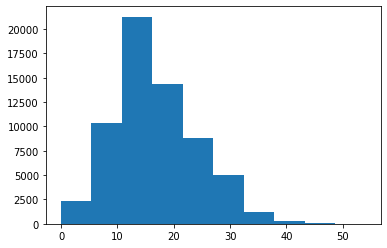

In [105]:
plt.hist(test['Disposals'])
plt.show()

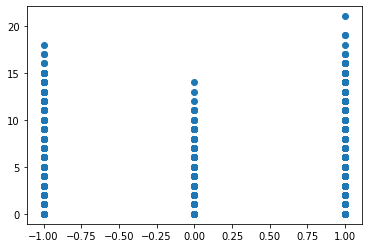

In [106]:
plt.scatter(test['WinLoss'], test['Marks'])
plt.show()

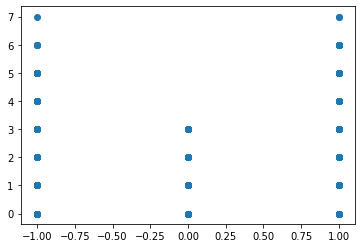

In [107]:
plt.scatter(test['WinLoss'], test['Behinds'])

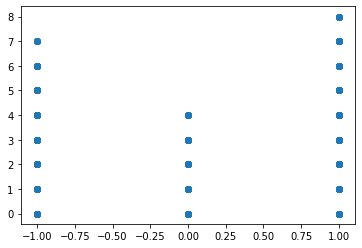

In [108]:
plt.scatter(test['WinLoss'], test['ContestedMarks'])

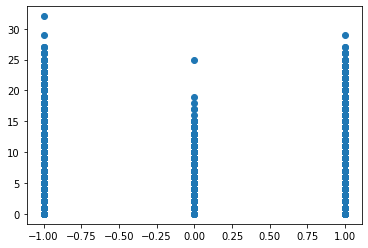

In [109]:
plt.scatter(test['WinLoss'], test['ContendedPossessions'])

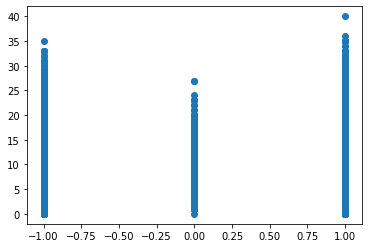

In [110]:
plt.scatter(test['WinLoss'], test['UncontendedPossessions'])

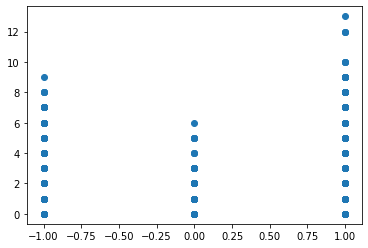

In [111]:
plt.scatter(test['WinLoss'], test['MarksInside50'])
plt.show()

In [0]:
columns.remove("Season")

##After good cleaning

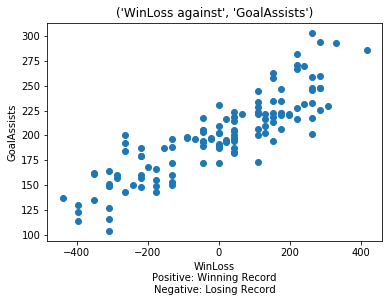

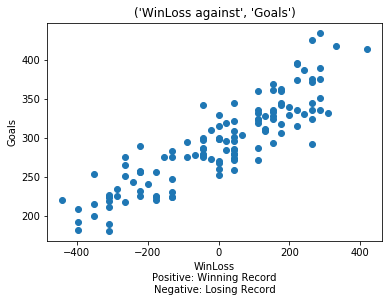

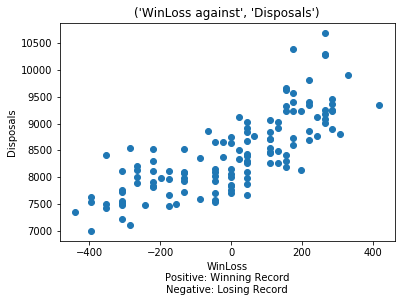

In [113]:
# Make All The Scatterplots
columns1 = ['GoalAssists', 'Goals', 'Disposals']

for i in range(0, len(columns1)):

  # Set title of scatter plot with variables being compared
  title='WinLoss against', columns1[i]
  plt.title(title)
  
  # create the scatterplot
  plt.scatter(finalfinal['WinLoss'], finalfinal[columns1[i]])
  
  # set xlabel
  plt.xlabel('WinLoss\nPositive: Winning Record\nNegative: Losing Record')

  # set ylabel to change for each column being plotted
  plt.ylabel(columns1[i])
  plt.show()

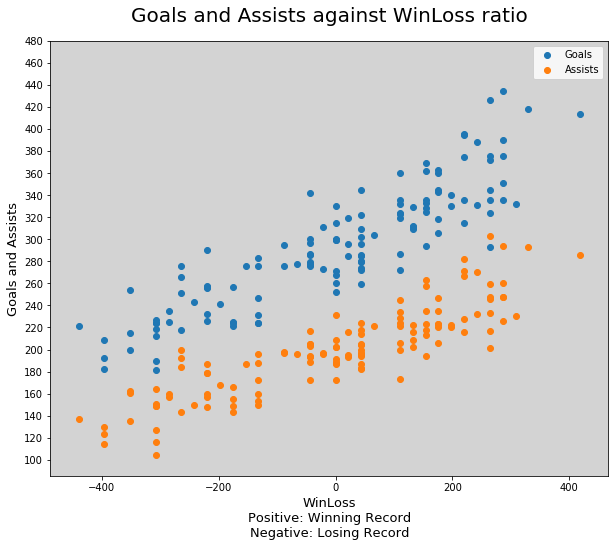

In [114]:
fig, ax = plt.subplots(figsize = (10,8))

# Set Color
ax.set_facecolor(color = 'lightgray')

ax.set_title('Goals and Assists against WinLoss ratio', size = 20, y = 1.03)
# ax.scatter(finalfinal['WinLoss'], finalfinal['Disposals'])

# Set xlabel
ax.set_xlabel('WinLoss\nPositive: Winning Record\nNegative: Losing Record', size = 13)

# set ylabel
ax.set_ylabel('Goals and Assists', size = 13)

# plot goals
goal = ax.scatter(finalfinal['WinLoss'], finalfinal['Goals'], label = 'Goals')

# plot assists
assist = ax.scatter(finalfinal['WinLoss'], finalfinal['GoalAssists'], label = 'Assists')

# set yticks start, end and distance between
ax.set_yticks(range(100, 500, 20))

# show the legend
ax.legend(handles = [goal, assist])
plt.show()

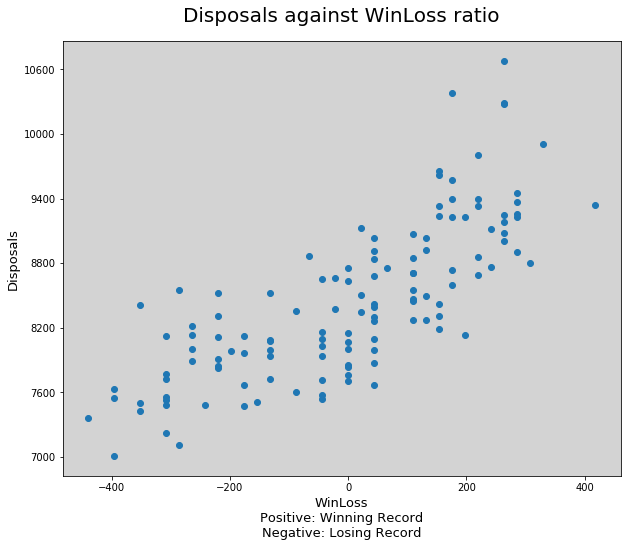

In [115]:
fig, ax = plt.subplots(figsize = (10,8))

# Set Color
ax.set_facecolor(color = 'lightgray')

ax.set_title('Disposals against WinLoss ratio', size = 20, y = 1.03)

ax.scatter(finalfinal['WinLoss'], finalfinal['Disposals'])

# Set xlabel
ax.set_xlabel('WinLoss\nPositive: Winning Record\nNegative: Losing Record', size = 13)

# set ylabel
ax.set_ylabel('Disposals', size = 13)

ax.set_yticks(range(7000, 11000, 600))

plt.show()

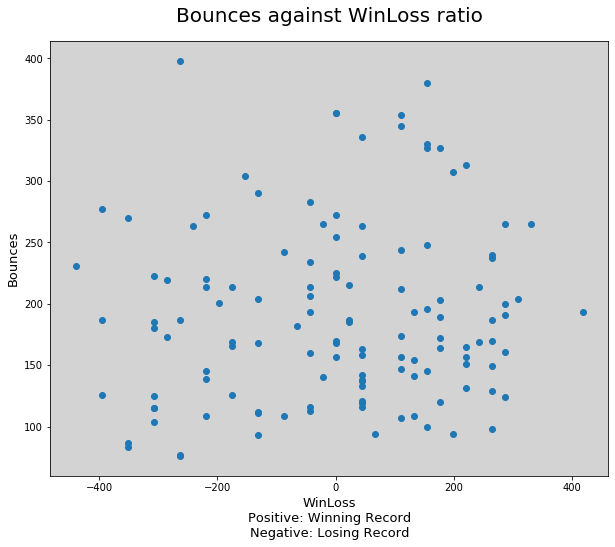

In [116]:
# create a scatter plot using bounces statistic

# set the figsize
fig, ax = plt.subplots(figsize = (10,8))

# Set Color
ax.set_facecolor(color = 'lightgray')

# set Title
ax.set_title('Bounces against WinLoss ratio', size = 20, y = 1.03)

#plot data points 
ax.scatter(finalfinal['WinLoss'], finalfinal['Bounces'])

# Set xlabel
ax.set_xlabel('WinLoss\nPositive: Winning Record\nNegative: Losing Record', size = 13)

# set ylabel
ax.set_ylabel('Bounces', size = 13)

plt.show()

#To Use or Not to Use?

In [0]:
correlationtable = finalfinal.corr()
correlationtable
type(correlationtable)
correlationtable['WinLoss'] = correlationtable['WinLoss']*100
percent = pd.DataFrame(correlationtable['WinLoss'])

In [118]:
percent

,WinLoss
Season,0.000000
WinLoss,100.000000
Disposals,77.153162
Kicks,81.771902
Marks,58.553381
Handballs,55.172521
Goals,88.296421
Behinds,72.811400
Hitouts,45.225749
Tackles,62.410081


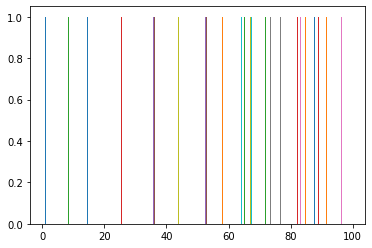

In [119]:
fig, ax = plt.subplots()

ax.hist(percent) #, orientation = 'horizontal')
# ax.set_yticklabels(percent.columns, fontsize = 12, color = 'gray')


plt.show()

In [0]:
from astropy.table import QTable, Table, Column
from astropy import units as u



In [0]:
def corrtab(data):
  team = pd.DataFrame(data['Team'].value_counts()).T.columns
  team = teams.sort_values()
  new_df = pd.DataFrame()
  # i = 0
  for i in range(0, len(team)):
    # slice = getIndexes(data, team[i])
    # new = pd.DataFrame(data.loc[slice[0]:slice[1]].sum()).T
    # new['Team'] = teams[i]
    # new['Season'] = season
    correlationtable = data[data['Team'] == team[i]].corr()
    # return correlationtable
    correlationtable['WinLoss'] = correlationtable['WinLoss'] * 100
    percent = pd.DataFrame(correlationtable['WinLoss']).T
    percent.drop(labels = ['WinLoss', 'Season'], axis = 1, inplace = True)
    new_df = new_df.append(percent, ignore_index = True)
  
  return new_df 

In [0]:
percent_df = corrtab(finalfinal)

In [123]:
percent_df.shape

(18, 22)

In [0]:
# plt.scatter(finalfinal['WinLoss'], percent_df['Disposals'])

In [0]:
# percent_df.set_index(keys = teams, drop = False)
# percent_df.insert(0, 'Teams', teams)
percent_df.insert(1, 'WinLoss', finalfinal['WinLoss'])
# percent_df.columns = ['Team', 'Disposals', 'Kicks', 'Marks', 'Handballs', 'Goals', 'Behinds',
#        'Hitouts', 'Tackles', 'Rebound50s', 'Inside50s', 'Clearances',
#        'Clangers', 'FreesFor', 'FreesAgainst', 'BrownlowVotes',
#        'ContendedPossessions', 'UncontendedPossessions', 'ContestedMarks',
#        'MarksInside50', 'OnePercenters', 'Bounces', 'GoalAssists']

In [0]:
# newind = percent_df.set_index(keys = 'Teams', drop = True)

In [0]:
# newind = newind.T

In [0]:
# function for ttest against wins and losses
def T_Test(name):
  final_mean = finalfinal[name].mean()
  print("The results for", name, ":\n", ttest_ind(finalfinal['WinLoss'], finalfinal[name]))
  print("Average", name, "in finalfinal:", final_mean, '\n')

In [129]:
T_Test(columns[4])

The results for Goals :
 Ttest_indResult(statistic=-15.822880924777026, pvalue=1.5239843307048162e-39)
Average Goals in finalfinal: 294.62698412698415 



In [0]:
# # run function comparing wins and losses against all other values
# for i in range(0, len(columns)):
#   T_Test_final(columns[i])